# Linear regression  with Tensorflow

###### Our company needs to have a clearer idea about how the adverstising investment is having effect on the company benefits.. We have all the records since 1986 and as a first point we need to find the linear regression for this.


To achieve this, we will make use of **tensorflow**, an open source library for numeric computation using data flow graphs

First af all, we need to import the required libraries:

**pandas**: This is used to load data from a csv file.

**numpy**: It will help us to manipulate arrays

**matplotlib.pyplot**: It display the graph

**tensorflow**: the deep learning tool.

In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

Now we define the constant values such as the csv file path and the columns name.

In [6]:
DATA_PATH = 'data/company_investment.train'
COLUMNS = ["Year", "Advertising_expenses", "Turnover"]

To implement our linear regression we need some constants values that will be used by **tensorflow**

**learning_rate**: 

**training_epochs**:  It is a measure of the number of times all of the training vectors are used once to update the weights.

**display_step**: This one is used to print the info every epoches. 

In [22]:
learning_rate = 0.03
training_epochs = 200
display_step = 20

Loading the csv file by pandas (More infor abbout reading a csv file can be found on [http://pandas.pydata.org/pandas-docs/stable/tutorials.html](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

In [23]:
data = pd.read_csv(tf.gfile.Open(DATA_PATH),
        names=COLUMNS,
        sep=',',
        header=0,
        engine="python")

Once we have loaded the csv into a variable we need to find the two arrays that will contain the values for X and Y axis. As we can see below we take the values from the column "Advertising_expenses" to set the X acis and the values from column "Turnover" for the Y axis. We also format the values in these arrays as float

In [24]:
train_X= np.asarray([i[1] for i in data.loc[:,['Advertising_expenses']].to_records()],dtype="float")
train_Y= np.asarray([i[1] for i in data.loc[:,['Turnover']].to_records()],dtype="float")

We need to find the number of elements in X axis.

In [25]:
n_samples = train_X.shape[0]

We describe the format for each axis in the graph

In [26]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Initially wegot some random values for weight and bias.

In [27]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Construct a linear model

In [28]:
pred = tf.add(tf.mul(X, W), b)

Mean squared error

In [29]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

Tensorflow provide us with some other optimize. The **GradientDescentOptimizer** takes in two values, the function to optimize/find the minimum of and the learning rate associated with it

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

It's almost done!! initialize_all_variables just initialize all the variables for the graph

In [31]:
init = tf.initialize_all_variables()

Epoch: 0020 cost= 492.901458740 W= 6.96231 b= -0.498643
Epoch: 0040 cost= 492.459838867 W= 6.96598 b= -0.641154
Epoch: 0060 cost= 492.028015137 W= 6.96959 b= -0.781091
Epoch: 0080 cost= 491.607727051 W= 6.97313 b= -0.918501
Epoch: 0100 cost= 491.196136475 W= 6.97661 b= -1.05343
Epoch: 0120 cost= 490.794403076 W= 6.98002 b= -1.18592
Epoch: 0140 cost= 490.401885986 W= 6.98338 b= -1.31602
Epoch: 0160 cost= 490.018798828 W= 6.98667 b= -1.44377
Epoch: 0180 cost= 489.644622803 W= 6.9899 b= -1.56922
Epoch: 0200 cost= 489.279052734 W= 6.99308 b= -1.69239
Optimization Finished!
Training cost= 489.279 W= 6.99308 b= -1.69239 



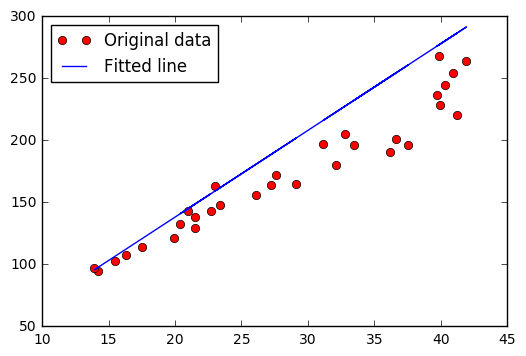

In [32]:
with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend(loc='upper left')
    plt.show()